# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Coleta de dados e preparação de atributos</span>


## <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---
#### <font color='red'> As respostas devem ser fornecidas no Moodle. O notebook é apenas para a implementação dos códigos que fornecerão as respostas</font>

---

Usaremos uma base de dados obtida em : https://dados.educacao.sp.gov.br/dataset/quantidade-de-alunos-por-tipo-de-ensino-da-rede-estadual

O Banco de Dados de Quantidade de alunos por tipo de ensino, apresenta o número de alunos matriculados em cada tipo de ensino por Unidade Escolar da Rede Estadual.

As colunas possuem significado de acordo com o "dicionário de dados" disponível ao visualizar o arquivo no referido site. As colunas são rotuladas da seguinte forma:

* CDREDE | Código da Diretoria de Ensino | Numérico inteiro
* DE | Nome da Diretoria de Ensino | Texto
* CODMUN | Código do município | Numérico inteiro
* MUN | Nome do município | Texto
* CATEG | Categoria das Classes (1 = regular, 2 = vinculada) | Numérico inteiro
* COD_ESC | Código da escola | Numérico inteiro
* TIPOESC | Tipo da escola | Numérico inteiro
* CODVINC | Código da vinculadora | Numérico inteiro
* NOMESC | Nome da escola | Texto
* ENDESC | Endereço da escola | Texto
* NUMESC | Número do endereço | Alfanumérico
* BAIESC | Bairro da escola | Texto
* EMAIL | E-mail da escola | Alfanumérico
* FONE1 | Telefone da escola | Alfanumérico
* ZONA | Zona (1 = urbana, 2 = rural) | Numérico inteiro
* ED_INFANTIL | Quantidade de alunos do tipo de ensino "Educação Infantil" | Numérico inteiro
* CLASSES ESPECIAIS | Quantidade de alunos do tipo de ensino "Classes Especiais" | Numérico inteiro
* SALA DE RECURSO | Quantidade de alunos do tipo de ensino "Sala de Recurso" | Numérico inteiro
* ANOS INICIAIS | Quantidade de alunos do tipo de ensino "Ensino Fundamental - Anos Iniciais" | Numérico inteiro
* ANOS FINAIS | Quantidade de alunos do tipo de ensino "Ensino Fundamental - Anos Finais" | Numérico inteiro
* ENSINO MEDIO | Quantidade de alunos do tipo de ensino "Ensino Médio" | Numérico inteiro
* EJA FUNDAMENTAL_AI | Quantidade de alunos do tipo de ensino "EJA - Ensino Fundamental - Anos Iniciais" | Numérico inteiro
* EJA ENSINO MÉDIO | Quantidade de alunos do tipo de ensino "EJA - Ensino Médio" | Numérico inteiro
* EJA FUNDAMENTAL_AF | Quantidade de alunos do tipo de ensino "EJA - Ensino Fundamental - Anos Finais" | Numérico inteiro
* EJA FUNDAMENTAL_MULTI | Quantidade de alunos do tipo de ensino "EJA - Ensino Fundamental - Multisseriada" | Numérico inteiro

A cada questão, recarregue a base de dados para que não haja dependência entre questões.

In [2]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# carregando dados
dc = pd.read_csv("./dados/quant_alunos_2023_2.csv", sep=',')
ncols = dc.shape[1]
ncols = dc.shape[1]
print("atributos: ", ncols)
print("linhas: ", dc.shape[0])

atributos:  24
linhas:  5532


In [3]:
dc.columns

Index(['CDREDE', 'DE', 'CODMUN', 'MUN', 'CATEG', 'COD_ESC', 'TIPOESC',
       'CODVINC', 'NOMESC', 'ENDESC', 'BAIESC', 'EMAIL', 'FONE1', 'ZONA',
       'ED_INFANTIL', 'CLASSES ESPECIAIS', 'SALA DE RECURSO', 'ANOS INICIAIS',
       'ANOS FINAIS', 'ENSINO MEDIO', 'EJA FUNDAMENTAL_AI', 'EJA ENSINO MÉDIO',
       'EJA FUNDAMENTAL_AF', 'EJA FUNDAMENTAL_MULTI'],
      dtype='object')

---

# Questão 1)

Considere os seguintes problemas e a natureza dos seus respectivos dados:

I - Dados demográficos e de desempenho escolar de escolas da capital do estado de São Paulo, a partir dos quais se pretende inferir um modelo para aplicar nas demais escolas do estado de São Paulo<br>
II - Dados demográficos e de desempenho escolar de 500 escolas do estado de São Paulo, escolhidas aletoriamente de forma estratificada em grupos de municípios de diferentes populações, com os quais se pretende inferir um modelo para aplicar nas demais escolas do estado<br>
III - Dados de valor de uma criptomoeda amostrados de forma igualmente espaçada, a cada minuto, nos últimos 5 anos, a partir do qual se pretende realizar uma predição do próximo valor dessa criptomoeda<br>

Podemos utilizar métodos que assumam dados do tipo i.i.d. (independente e identicamente distribuídos) e garantir que esses métodos irão obter resultados e conclusões válidas em quais dos casos?

(a) I<br>
(b) I e II<br>
**(c) II** <br>
(d) I e III<br>
(e) III<br>

---

# Questão 2)


Crie um novo atributo (coluna) chamado `RAZAO_CLASSE_ESP_ENSINO` com base em três atributos existentes. Para isso:
1. calcule a razão entre o número de alunos em 'CLASSES ESPECIAIS' e soma dos valores de 'ANOS INICIAIS' e 'ANOS FINAIS';
2. substitua por `np.nan` (i.e. nulo) as linhas da nova variável (RAZAO_CLASSE_ESP_ENSINO) para as quais: (1) o valor em CLASSES ESPECIAIS é igual a zero, OU (2) a soma de 'ANOS INICIAIS' e 'ANOS FINAIS' é igual a zero;
3. realize a **discretização** da variável 'RAZAO_CLASSE_ESP_ENSINO' utilizando duas técnicas:
  * o método dos quantis (qcut), utilizando 5 intervalos alvo
  * o método dos intervalos (cut), utilizando os seguintes intervalos alvo: (0, 0.025] (0.025, 0.05] (0.05, 0.075] (0.075, 0.1] (0.1, max(RAZAO_CLASSE_ESP_ENSINO)],<br>
em que max(RAZAO_CLASSE_ESP_ENSINO) é o maior valor desse atributo.

4. Adicione essas novas variáveis discretizadas no dataframe com os nomes 'RAZAO_CLASSE_ESP_ENSINO_Q' (quantis) e 'RAZAO_CLASSE_ESP_ENSINO_I' (intervalos).

Qual é a quantidade de dados (frequências dos valores discretizados) na base após a discretização, relativos ao último intervalo (com os maiores valores) para, respectivamente, RAZAO_CLASSE_ESP_ENSINO_Q e RAZAO_CLASSE_ESP_ENSINO_I?

(a) RAZAO_CLASSE_ESP_ENSINO_Q: 496, RAZAO_CLASSE_ESP_ENSINO_I: 1006<br>
**(b) RAZAO_CLASSE_ESP_ENSINO_Q: 502, RAZAO_CLASSE_ESP_ENSINO_I: 97**<br>
(c) RAZAO_CLASSE_ESP_ENSINO_Q: 502, RAZAO_CLASSE_ESP_ENSINO_I: 1006<br>
(d) RAZAO_CLASSE_ESP_ENSINO_Q: 507, RAZAO_CLASSE_ESP_ENSINO_I: 97<br>
(e) RAZAO_CLASSE_ESP_ENSINO_Q: 507, RAZAO_CLASSE_ESP_ENSINO_I: 1006<br>


In [146]:
df = pd.read_csv("./dados/quant_alunos_2023_2.csv", sep=',')
df.columns

Index(['CDREDE', 'DE', 'CODMUN', 'MUN', 'CATEG', 'COD_ESC', 'TIPOESC',
       'CODVINC', 'NOMESC', 'ENDESC', 'BAIESC', 'EMAIL', 'FONE1', 'ZONA',
       'ED_INFANTIL', 'CLASSES ESPECIAIS', 'SALA DE RECURSO', 'ANOS INICIAIS',
       'ANOS FINAIS', 'ENSINO MEDIO', 'EJA FUNDAMENTAL_AI', 'EJA ENSINO MÉDIO',
       'EJA FUNDAMENTAL_AF', 'EJA FUNDAMENTAL_MULTI'],
      dtype='object')

In [147]:
df.iloc[0]

CDREDE                                          10101
DE                                            NORTE 1
CODMUN                                            100
MUN                                         SAO PAULO
CATEG                                               1
COD_ESC                                           103
TIPOESC                                             8
CODVINC                                           NaN
NOMESC                   JOAO BOEMER JARDIM PROFESSOR
ENDESC                             CRISTOVAO SANTIAGO
BAIESC                                  JARDIM ONDINA
EMAIL                     E000103A@EDUCACAO.SP.GOV.BR
FONE1                                      38513079.0
ZONA                                              1.0
ED_INFANTIL                                         0
CLASSES ESPECIAIS                                   0
SALA DE RECURSO                                     0
ANOS INICIAIS                                    1028
ANOS FINAIS                 

In [148]:
# df['CLASSES ESPECIAIS'].replace(0, np.nan)
# df['RAZAO_CLASSE_ESP_ENSINO'] =  (
#     df.apply(
#         lambda row: row['CLASSES ESPECIAIS'] / (row['ANOS FINAIS'] + row['ANOS INICIAIS'])
#         if row['ANOS INICIAIS'] + row['ANOS FINAIS'] != 0  else np.nan, axis=1)
#     )


df['RAZAO_CLASSE_ESP_ENSINO'] = df['CLASSES ESPECIAIS'] / (df['ANOS FINAIS']+df['ANOS INICIAIS'])

In [149]:
df.loc[(df['CLASSES ESPECIAIS'] == 0) | (df['ANOS FINAIS']+df['ANOS INICIAIS'] == 0), 'RAZAO_CLASSE_ESP_ENSINO'] = np.nan

In [151]:
faixas = [0, 0.025, 0.05, 0.075, 0.1, df['RAZAO_CLASSE_ESP_ENSINO'].max()]


In [152]:
df['RAZAO_CLASSE_ESP_ENSINO_Q'] = pd.qcut(df['RAZAO_CLASSE_ESP_ENSINO'], 5)
df['RAZAO_CLASSE_ESP_ENSINO_I'] = pd.cut(df['RAZAO_CLASSE_ESP_ENSINO'], faixas)

In [155]:
df['RAZAO_CLASSE_ESP_ENSINO_Q'].value_counts().sort_index()

RAZAO_CLASSE_ESP_ENSINO_Q
(0.00025, 0.0161]    503
(0.0161, 0.025]      503
(0.025, 0.0357]      507
(0.0357, 0.0516]     496
(0.0516, 0.339]      502
Name: count, dtype: int64

In [156]:
df['RAZAO_CLASSE_ESP_ENSINO_I'].value_counts().sort_index()

RAZAO_CLASSE_ESP_ENSINO_I
(0.0, 0.025]     1006
(0.025, 0.05]     976
(0.05, 0.075]     311
(0.075, 0.1]      121
(0.1, 0.339]       97
Name: count, dtype: int64

----

# Questão 3)

Normalize a variável ENSINO MEDIO utilizando dois métodos:
1. padronização z-score
2. normalização min-max para o intervalo 0 a 1000 (mil)

Para isso, codifique funções que recebam uma coluna por parâmetro e retornem um atributo já normalizado

Aplique as funções criando novas variáveis com os atributos normalizados: ENSINO MEDIO_z e ENSINO MEDIO_mm

Após a normalização, quais os valores de média e mediana dessas novas variáveis, arredondando para 1 casa decimal?

(a) ENSINO MEDIO_z: média=0.0, mediana=0.0; ENSINO MEDIO_mm: média=115.3, mediana=115<br>
(b) ENSINO MEDIO_z: média=0.3, mediana=-0.3; ENSINO MEDIO_mm: média=115.3, mediana=74.1<br>
**(c) ENSINO MEDIO_z: média=0.0, mediana=-0.3; ENSINO MEDIO_mm: média=115.3, mediana=74.1**<br>
(d) ENSINO MEDIO_z: média=0.3, mediana=0.0; ENSINO MEDIO_mm: média=115.3, mediana=115<br>
(e) ENSINO MEDIO_z: média=0.0, mediana=-0.3; ENSINO MEDIO_mm: média=138.5, mediana=74.1<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [20]:
dc = pd.read_csv("./dados/quant_alunos_2023_2.csv", sep=',')

In [21]:
from scipy.stats import zscore

In [25]:
z = zscore(dc['ENSINO MEDIO'])

round(z.mean(), 1), round(z.median(), 1)

(0.0, -0.3)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1000))

mm = scaler.fit_transform(dc['ENSINO MEDIO'].to_numpy().reshape(-1, 1))

round(np.mean(mm), 1), round(np.median(mm), 1)

(115.3, 74.1)

---
# Questão 4)

1. Remova todas as linhas com ocorrência de Nulos no subconjunto de colunas: 'EJA FUNDAMENTAL_AI', 'EJA ENSINO MÉDIO', 'EJA FUNDAMENTAL_AF', 'EJA FUNDAMENTAL_MULTI';
2. Produza dois novos atributos (colunas):
  - `EJA_TOTAL`, como sendo a soma das colunas 'EJA FUNDAMENTAL_AI', 'EJA ENSINO MÉDIO', 'EJA FUNDAMENTAL_AF' e 'EJA FUNDAMENTAL_MULTI'
  - `FUND_MEDIO_TOTAL`, como sendo a soma das colunas 'ANOS INICIAIS','ANOS FINAIS' e 'ENSINO MEDIO'
3. Transforme 'EJA_TOTAL' e 'FUND_MEDIO_TOTAL' utilizando a operação logarítmica no seguinte formato: seja $x$ o atributo original, obtemos a sua versão transformada,
$$x' = \log_2{(x+1)}$$
e os adicione à base de dados com novos nomes, ex. 'FUND_MEDIO_TOTAL_L' e  'EJA_TOTAL_L',
4. Calcule a correlação entre os atributos 'EJA_TOTAL', 'FUND_MEDIO_TOTAL', 'FUND_MEDIO_TOTAL_L' e  'EJA_TOTAL_L' (utilize o método `.corr()`)

Qual o valor obtido da correlação entre as variáveis EJA_TOTAL e FUND_MEDIO_TOTAL e entre as variáveis FUND_MEDIO_TOTAL_L e EJA_TOTAL_L, respectivamente, arredondando para 2 casas decimais?

(a) -0.02, -0.21<br>
(b) 0.04, -0.02<br>
(c) -0.05, 0.20<br>
**(d) -0.05, -0.21**<br>
(e) 0.04, 0.56<br>

In [16]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("./dados/quant_alunos_2023_2.csv", sep=',')

In [7]:
df[['EJA FUNDAMENTAL_AI', 'EJA ENSINO MÉDIO', 'EJA FUNDAMENTAL_AF', 'EJA FUNDAMENTAL_MULTI']].isnull().sum()

EJA FUNDAMENTAL_AI       8
EJA ENSINO MÉDIO         8
EJA FUNDAMENTAL_AF       6
EJA FUNDAMENTAL_MULTI    8
dtype: int64

In [8]:
df.dropna(subset=['EJA FUNDAMENTAL_AI', 'EJA ENSINO MÉDIO', 'EJA FUNDAMENTAL_AF', 'EJA FUNDAMENTAL_MULTI'], inplace=True)


In [9]:
df[['EJA FUNDAMENTAL_AI', 'EJA ENSINO MÉDIO', 'EJA FUNDAMENTAL_AF', 'EJA FUNDAMENTAL_MULTI']].isnull().sum()

EJA FUNDAMENTAL_AI       0
EJA ENSINO MÉDIO         0
EJA FUNDAMENTAL_AF       0
EJA FUNDAMENTAL_MULTI    0
dtype: int64

In [10]:
df['EJA FUNDAMENTAL_AI'] + df['EJA ENSINO MÉDIO'] + df['EJA FUNDAMENTAL_AF'] + df['EJA FUNDAMENTAL_MULTI']

0         0.0
1       332.0
2       174.0
3         0.0
6         0.0
        ...  
5527      0.0
5528      0.0
5529      0.0
5530      0.0
5531      0.0
Length: 5524, dtype: float64

In [11]:
# Suponha que 'df' seja o seu DataFrame
df[['EJA FUNDAMENTAL_AI', 'EJA ENSINO MÉDIO', 'EJA FUNDAMENTAL_AF', 'EJA FUNDAMENTAL_MULTI']].sum(axis=1)


0         0.0
1       332.0
2       174.0
3         0.0
6         0.0
        ...  
5527      0.0
5528      0.0
5529      0.0
5530      0.0
5531      0.0
Length: 5524, dtype: float64

In [12]:
df['EJA TOTAL'] = df['EJA FUNDAMENTAL_AI'] + df['EJA ENSINO MÉDIO'] + df['EJA FUNDAMENTAL_AF'] + df['EJA FUNDAMENTAL_MULTI']

In [13]:
df['FUND_MEDIO_TOTAL'] = df[['ANOS INICIAIS','ANOS FINAIS', 'ENSINO MEDIO']].sum(axis=1)

In [17]:
df['EJA TOTAL_L'] = np.log(df['EJA TOTAL']+1)
df['FUND_MEDIO_TOTAL_L'] =  np.log(df['FUND_MEDIO_TOTAL']+1)

In [18]:
matriz_corr = df[['EJA TOTAL', 'FUND_MEDIO_TOTAL', 'FUND_MEDIO_TOTAL_L', 'EJA TOTAL_L']].corr()
matriz_corr

,EJA TOTAL,FUND_MEDIO_TOTAL,FUND_MEDIO_TOTAL_L,EJA TOTAL_L
EJA TOTAL,1.000000,-0.046551,-0.258882,0.555710
FUND_MEDIO_TOTAL,-0.046551,1.000000,0.689055,0.044857
FUND_MEDIO_TOTAL_L,-0.258882,0.689055,1.000000,-0.208242
EJA TOTAL_L,0.555710,0.044857,-0.208242,1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

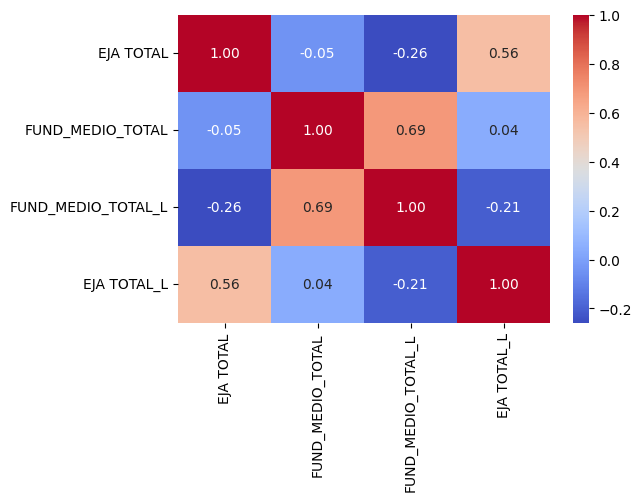

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm");

----

# Questão 5)

Com base na variável categórica 'DE':
* remova os números/dígitos finais das strings, de forma que, por exemplo os valores 'NORTE 1' e 'NORTE 2' sejam transformados em apenas 'NORTE';
* codifique a variável resultante (após a transformação anterior) considerando ordem alfabética e usando números inteiros sequenciais iniciados por 0, para isso gere um novo atributo DE_cod usando `cat.codes` da biblioteca `pandas`.

Use a função `value_counts()` para mostrar a frequência dos códigos de DE_cod. Quais são os dois **valores discretos** de DE_cod (ou seja, após codificação realizada) com a maior frequência (maior contagem)?

**(a) códigos 42 e 75**<br>
(b) códigos 64 e 83<br>
(c) códigos 66 e 82<br>
(d) códigos 82 e 83<br>
(e) códigos 5530 e 5531<br>

In [71]:
df = pd.read_csv("./dados/quant_alunos_2023_2.csv", sep=',')

In [72]:
df['DE'].unique()

array(['NORTE 1', 'CENTRO', 'NORTE 2', 'LESTE 5', 'LESTE 1', 'LESTE 4',
       'LESTE 2', 'LESTE 3', 'CENTRO OESTE', 'SUL 2', 'CENTRO SUL',
       'SUL 1', 'SUL 3', 'CAIEIRAS', 'GUARULHOS SUL', 'GUARULHOS NORTE',
       'MOGI DAS CRUZES', 'SUZANO', 'ITAQUAQUECETUBA', 'DIADEMA', 'MAUA',
       'SANTO ANDRE', 'SAO BERNARDO DO CAMPO', 'CARAPICUIBA',
       'ITAPECERICA DA SERRA', 'ITAPEVI', 'OSASCO', 'TABOAO DA SERRA',
       'SANTOS', 'SAO VICENTE', 'GUARATINGUETA', 'PINDAMONHANGABA',
       'SAO JOSE DOS CAMPOS', 'TAUBATE', 'JACAREI', 'CARAGUATATUBA',
       'APIAI', 'AVARE', 'BOTUCATU', 'ITAPETININGA', 'ITAPEVA', 'ITU',
       'SAO ROQUE', 'SOROCABA', 'VOTORANTIM', 'PIRAJU', 'ITARARE',
       'AMERICANA', 'BRAGANCA PAULISTA', 'CAMPINAS OESTE', 'JUNDIAI',
       'LIMEIRA', 'MOGI MIRIM', 'PIRACICABA', 'PIRASSUNUNGA',
       'SAO JOAO DA BOA VISTA', 'SUMARE', 'CAMPINAS LESTE', 'CAPIVARI',
       'ARARAQUARA', 'BARRETOS', 'FRANCA', 'JABOTICABAL',
       'RIBEIRAO PRETO', 'SAO CARLOS', 'SAO

In [76]:
df['DE'] =  df['DE'].str.replace(r'\s+\d+$',  "", regex=True)

In [78]:
df['DE'].astype('category').cat.codes.max(), df['DE'].astype('category').cat.codes.min()

(83, 0)

In [79]:
df['DE_code'] = df['DE'].astype('category').cat.codes

In [80]:
df[['DE', 'DE_code']]

,DE,DE_code
0,NORTE,51
1,NORTE,51
2,NORTE,51
3,NORTE,51
4,NORTE,51
...,...,...
5527,GUARATINGUETA,26
5528,GUARATINGUETA,26
5529,GUARATINGUETA,26
5530,GUARATINGUETA,26


In [82]:
df['DE_code'].value_counts()

DE_code
42    433
75    298
51    178
61    112
46    107
     ... 
24     25
31     23
68     21
54     20
57     17
Name: count, Length: 84, dtype: int64

In [47]:
df['DE_']

59    475
38    433
62    298
19    231
14    183
     ... 
21     25
10     25
27     23
49     20
52     17
Name: count, Length: 71, dtype: int64